In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy import signal

def const_window(N):
    return np.ones(N)

def plot_fft(func, filename, window = const_window):
    dt = 1 / 500
    N = 200
    ts = np.arange(0, dt * N, dt)
    ys = func(ts) * window(len(ts))
    yfft = fft(ys)
    yfft =  2.0 / N * np.abs(yfft[0:N//2])
    yfft[0] = yfft[0] / 2

    fig, axs = plt.subplots(2, 1)
    fine_ts = np.linspace(min(ts), max(ts), 1000)
    axs[0].plot(fine_ts, func(fine_ts) * window(len(fine_ts)))
    axs[0].scatter(ts, ys, marker='.')
    freqs = fftfreq(N, d=dt)[0:N//2]
    axs[1].step(freqs, yfft)
    axs[1].set(xlabel='f / Hz')
    axs[0].set(xlabel='t / s')
    print(freqs[1] - freqs[0])
    print(sum(yfft ** 2))
    fig.tight_layout()
    fig.savefig(f'out/{filename}')

2.5
1.0481909230987312
2.5
0.4294707153555493
2.5
0.14957348588270683


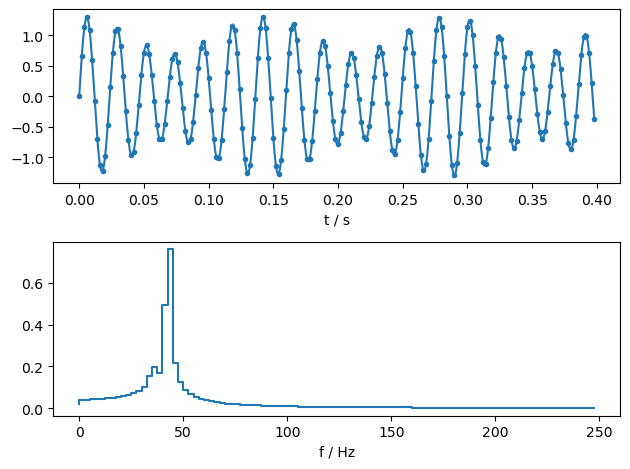

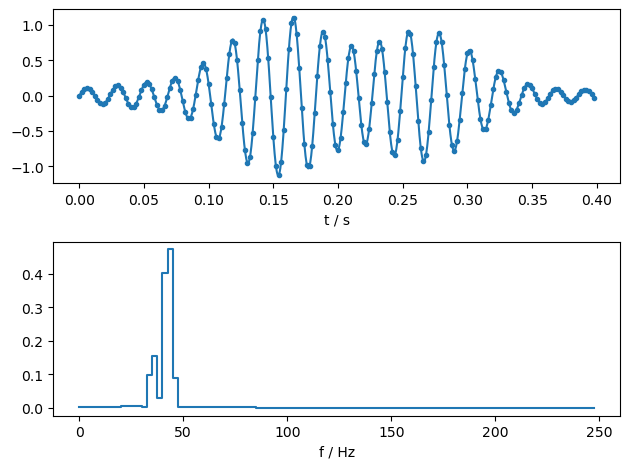

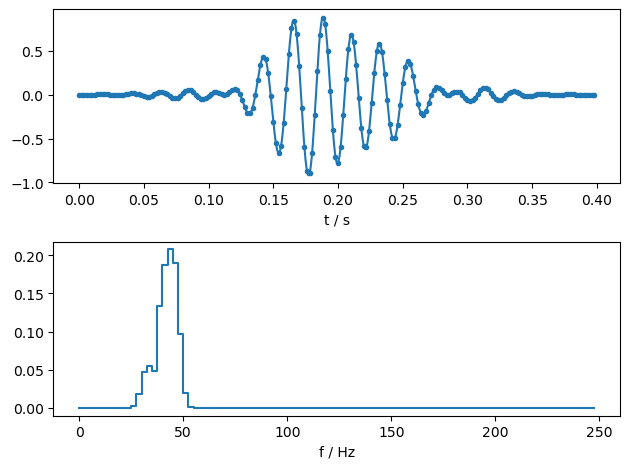

In [17]:
def sig(t):
    return np.sin(2 * np.pi * t * 44) + 0.3 * np.sin(2 * np.pi * t * 37)

plot_fft(sig, 'without_window')
plot_fft(sig, 'hamming_window', signal.windows.hamming)
plot_fft(sig, 'flattop', signal.windows.flattop)

In [67]:
def plot_window_spec(window, filename):
    xs = np.linspace(0, 1, 10000)
    N = len(xs)
    wind = window(N)
    wind = wind# - np.mean(wind)
    yfft = fft(wind)
    print(yfft)
    fig, axs = plt.subplots(2, 1)
    axs[0].plot(xs, wind, marker='.')
    axs[1].plot(np.abs(yfft))
    axs[1].set_yscale('log')
    axs[1].set(xlabel='f / Hz')
    axs[0].set(xlabel='t / s')
    fig.tight_layout()
    fig.savefig(f'out/{filename}')

[ 5.39954000e+03-0.00000000e+00j -2.30011485e+03-7.22602417e-01j
  1.53374191e-01+9.63678588e-05j ...  5.75129057e-02-5.42046526e-05j
  1.53374191e-01-9.63678588e-05j -2.30011485e+03+7.22602417e-01j]


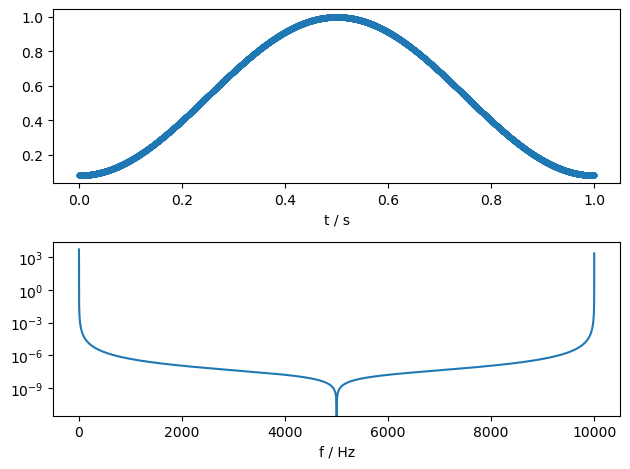

In [68]:
plot_window_spec(signal.windows.hamming, 'hammin_spec')